In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from vega_datasets import data

# Working with Time Series Exercises

### 1. Resample by the day and take the average temperature. Visualize the average temperature over time.

In [2]:
df = pd.DataFrame(data.sf_temps())
df.head()

,temp,date
0,47.8,2010-01-01 00:00:00
1,47.4,2010-01-01 01:00:00
2,46.9,2010-01-01 02:00:00
3,46.5,2010-01-01 03:00:00
4,46.0,2010-01-01 04:00:00


In [3]:
df = df.set_index('date').sort_index()
df.head()

,temp
date,
2010-01-01 00:00:00,47.8
2010-01-01 01:00:00,47.4
2010-01-01 02:00:00,46.9
2010-01-01 03:00:00,46.5
2010-01-01 04:00:00,46.0


<AxesSubplot:xlabel='date'>

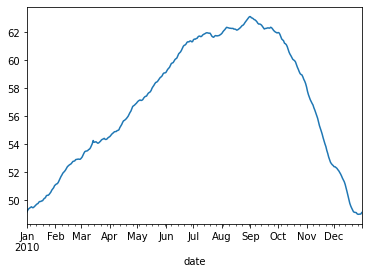

In [4]:
df.resample('1D').temp.mean().plot()

### 2. Write the code necessary to visualize the minimum temperature over time.


<AxesSubplot:xlabel='date'>

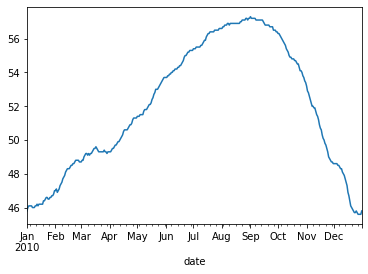

In [5]:
df.resample('1D').temp.min().plot()

### 3. Write the code necessary to visualize the maximum temperature over time.


<AxesSubplot:xlabel='date'>

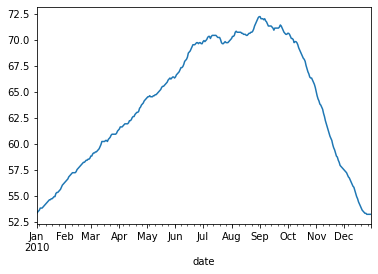

In [6]:
df.resample('1D').temp.max().plot()

### 4. Which month is the coldest, on average?


In [7]:
df.resample('1M').temp.mean()

date
2010-01-31    49.984140
2010-02-28    52.243899
2010-03-31    53.956528
2010-04-30    55.633056
2010-05-31    57.970968
2010-06-30    60.444722
2010-07-31    61.765457
2010-08-31    62.405376
2010-09-30    62.487083
2010-10-31    60.253091
2010-11-30    55.185139
2010-12-31    50.498253
Freq: M, Name: temp, dtype: float64

January is the coldest on average.

### 5. Which month has the highest average temperature?


In [8]:
df.resample('1M').temp.mean()

date
2010-01-31    49.984140
2010-02-28    52.243899
2010-03-31    53.956528
2010-04-30    55.633056
2010-05-31    57.970968
2010-06-30    60.444722
2010-07-31    61.765457
2010-08-31    62.405376
2010-09-30    62.487083
2010-10-31    60.253091
2010-11-30    55.185139
2010-12-31    50.498253
Freq: M, Name: temp, dtype: float64

September is the hottest on average.

### 6. Resample by the day and calculate the min and max temp for the day (Hint: .agg(['min', 'max'])). Use this resampled dataframe to calculate the change in temperature for the day. Which month has the highest daily temperature variability?

In [9]:
min_max_df = df.resample('1D').agg(['min','max'])

In [10]:
min_max_df.head()

temp      
             min   max
date                  
2010-01-01  45.8  53.3
2010-01-02  46.0  53.4
2010-01-03  46.1  53.5
2010-01-04  46.1  53.6
2010-01-05  46.1  53.8

In [11]:
min_max_df['daily_temp_change'] = min_max_df.temp['max'] - min_max_df.temp['min']

In [12]:
min_max_df.resample('1M').daily_temp_change.max()

date
2010-01-31     9.3
2010-02-28     9.9
2010-03-31    12.0
2010-04-30    13.0
2010-05-31    13.1
2010-06-30    14.8
2010-07-31    14.8
2010-08-31    15.0
2010-09-30    14.9
2010-10-31    14.4
2010-11-30    11.8
2010-12-31     8.9
Freq: M, Name: daily_temp_change, dtype: float64

August had the highest daily temp change

### 7. Bonus: Visualize the daily min, average, and max temperature over time on a single line plot, i.e. the min, average, and maximum temperature should be 3 seperate lines.

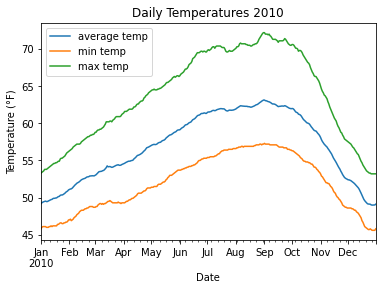

In [13]:
df.resample('1D').temp.mean().plot(label = 'average temp')
df.resample('1D').temp.min().plot(label = 'min temp')
df.resample('1D').temp.max().plot(label = 'max temp')
plt.title('Daily Temperatures 2010')
plt.ylabel('Temperature (°F)')
plt.xlabel('Date')
plt.legend();

In [14]:
df = data.seattle_weather()

### 1. Which year and month combination has the highest amount of precipitation?

In [15]:
df = df.set_index('date').sort_index()
df.head()

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle
2012-01-02,10.9,10.6,2.8,4.5,rain
2012-01-03,0.8,11.7,7.2,2.3,rain
2012-01-04,20.3,12.2,5.6,4.7,rain
2012-01-05,1.3,8.9,2.8,6.1,rain


In [16]:
df.shape

(1461, 5)

In [17]:
df.resample('M').sum().precipitation.tail(5)

date
2015-08-31     83.3
2015-09-30     21.1
2015-10-31    122.4
2015-11-30    212.6
2015-12-31    284.5
Freq: M, Name: precipitation, dtype: float64

12-2015

### 2. Visualize the amount of monthly precipitation over time.


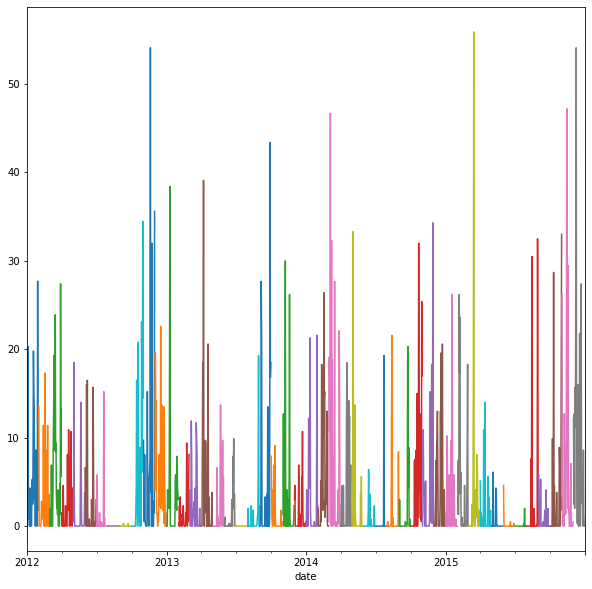

In [18]:
plt.figure(figsize=(10,10))
df.resample('M').precipitation.plot();

### 3. Visualize the amount of wind over time. Choose a time interval you think is appropriate.


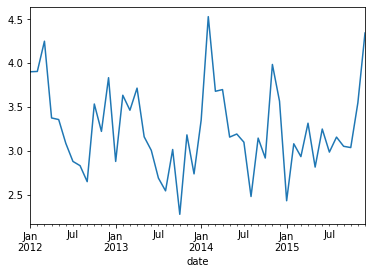

In [19]:
df.resample('M').wind.mean().plot();

### 4. Which year-month combination is the windiest?


In [20]:
df[df.wind == df.resample('M').wind.max().max()]

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2012-12-17,2.0,8.3,1.7,9.5,rain


12-2012

### 5. What's the sunniest year? (Hint: which year has the highest number of days where weather == sun?)

In [21]:
df[df.weather == 'sun'].resample("Y").weather.count()

date
2012-12-31    118
2013-12-31    205
2014-12-31    211
2015-12-31    180
Freq: A-DEC, Name: weather, dtype: int64

2014

### 6. In which month does it rain the most?


In [22]:
df['month'] = df.index.month

In [23]:
df.groupby('month').precipitation.sum().sort_values()

month
7      48.2
6     132.9
8     163.7
5     207.5
9     235.5
4     375.4
2     422.0
1     466.0
10    503.4
3     606.2
12    622.7
11    642.5
Name: precipitation, dtype: float64

In [24]:
df[df.weather == 'rain'].resample("M").weather.count().idxmax()

Timestamp('2012-11-30 00:00:00', freq='M')

### 7. Which month has the most number of days with a non-zero amount of precipitation?

In [25]:
df['did_rain'] = df.precipitation > 0

In [26]:
df.groupby('month').did_rain.mean().sort_values().tail(5)

month
1     0.532258
3     0.588710
11    0.591667
2     0.646018
12    0.653226
Name: did_rain, dtype: float64

In [27]:
df[df.precipitation > 0].resample('M').precipitation.count().idxmax()

Timestamp('2012-12-31 00:00:00', freq='M')

### 1. Convert any negative delays to 0.


In [28]:
df = data.flights_20k()

In [29]:
df = df.set_index('date').sort_index()
df.head()

,delay,distance,origin,destination
date,,,,
2001-01-01 00:01:00,14,405,MCI,MDW
2001-01-01 06:20:00,0,491,BNA,MCI
2001-01-01 06:30:00,-8,251,MDW,STL
2001-01-01 07:00:00,-10,361,OAK,ONT
2001-01-01 07:00:00,0,303,MSY,HOU


In [30]:
df.shape

(20000, 4)

In [31]:
df[df.delay < 0] = 0

In [32]:
df.delay = np.where(df.delay < 0, 0, df.delay)

In [33]:
df.head()

,delay,distance,origin,destination
date,,,,
2001-01-01 00:01:00,14,405,MCI,MDW
2001-01-01 06:20:00,0,491,BNA,MCI
2001-01-01 06:30:00,0,0,0,0
2001-01-01 07:00:00,0,0,0,0
2001-01-01 07:00:00,0,303,MSY,HOU


### 2. Which hour of the day has the highest average delay?


In [34]:
df.resample('H').delay.mean().idxmax()

Timestamp('2001-02-23 03:00:00', freq='H')

### 3. Does the day of the week make a difference in the delay amount?


In [42]:
df.resample('D').delay.mean()

date
2001-01-01     8.747126
2001-01-02    21.808411
2001-01-03    17.150000
2001-01-04     7.176724
2001-01-05     9.294118
                ...    
2001-03-27     4.669683
2001-03-28     3.551282
2001-03-29    13.545455
2001-03-30     8.893162
2001-03-31     7.000000
Freq: D, Name: delay, Length: 90, dtype: float64

In [40]:
df['week_day'] = df.index.day_name()

In [41]:
df.groupby('week_day').delay.mean()

week_day
Friday       17.757596
Monday        7.165772
Saturday      8.431498
Sunday       10.413542
Thursday     12.821322
Tuesday       9.410866
Wednesday    11.032478
Name: delay, dtype: float64

### 4. Does the month make a difference in the delay amount?


In [36]:
df.resample('M').delay.mean()

date
2001-01-31    11.301592
2001-02-28    12.306106
2001-03-31     9.875287
Freq: M, Name: delay, dtype: float64